# Agrupamiento de Datos
## Curso Ingeniería Masiva de Datos
## TecMilenio
## Ejercicio Kmeans Clustering con set de Datos Mall Customers

In [ ]:
# Importando librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sbs

<a id=1></a><br>
## Leer Datos

In [ ]:
# Incuye aquí el código para leer los datos del archivo 'Mall_Customers.csv'

df1 = pd.read_csv("Mall_Customers.csv")
df1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
# Incluye aquí el código para comprobar y describir los datos leídos

df1.info()
df1.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


<a id=1></a><br>
## Explorar Datos

In [ ]:
df1.Age

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

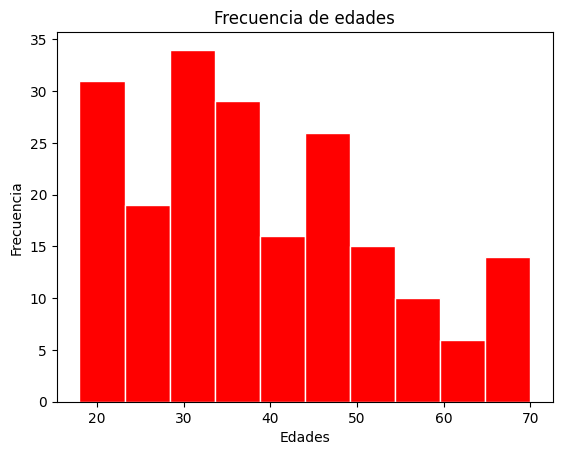

In [ ]:
# Incluye aquí tu código para crear histogramas
plt.hist(df1.Age, color = 'red', edgecolor='white')
plt.title('Frecuencia de edades')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.show()

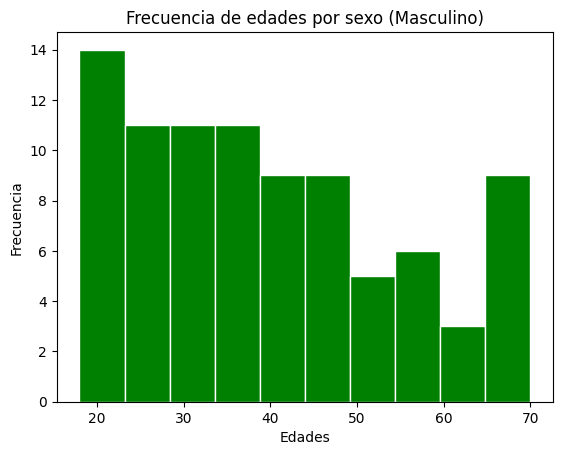

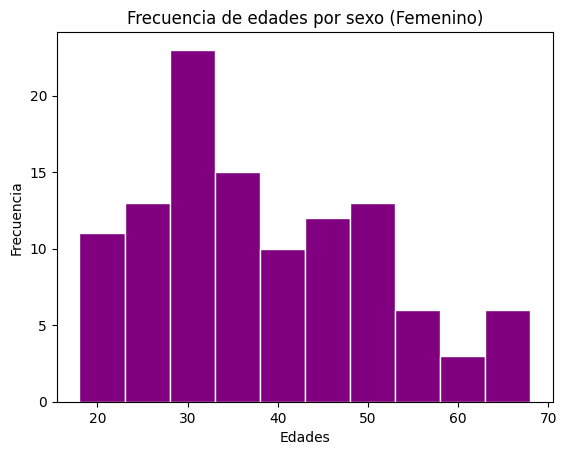

In [ ]:
df_male = df1[df1['Gender'] == 'Male']
df_female = df1[df1['Gender'] == 'Female']

plt.hist(df_male.Age, color = 'green', edgecolor = 'white')
plt.title('Frecuencia de edades por sexo (Masculino)')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.show()

plt.hist(df_female.Age, color = 'purple', edgecolor = 'white')
plt.title('Frecuencia de edades por sexo (Femenino)')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.show()

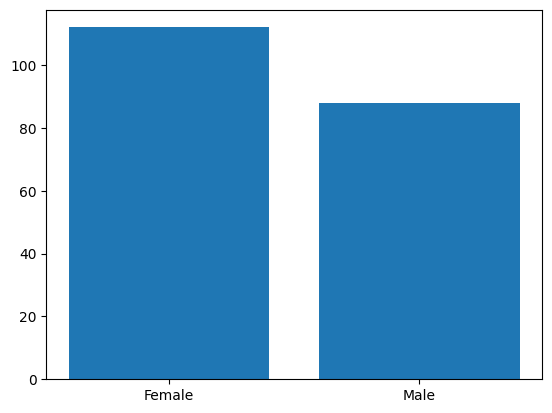

In [ ]:
# Gráfica de Barras de Edades
genders = df1.Gender.value_counts()
genders
plt.bar(genders.index, genders.values)
plt.show()

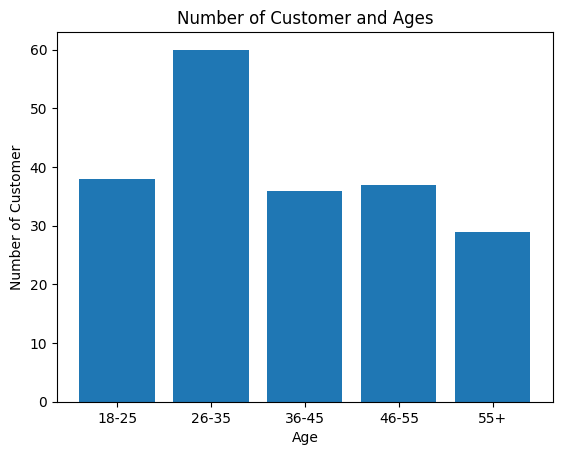

In [ ]:
age18_25 = df1.Age[(df1.Age <= 25) & (df1.Age >= 18)]
age26_35 = df1.Age[(df1.Age <= 35) & (df1.Age >= 26)]
age36_45 = df1.Age[(df1.Age <= 45) & (df1.Age >= 36)]
age46_55 = df1.Age[(df1.Age <= 55) & (df1.Age >= 46)]
age55above = df1.Age[df1.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.bar(x, y)
plt.show()

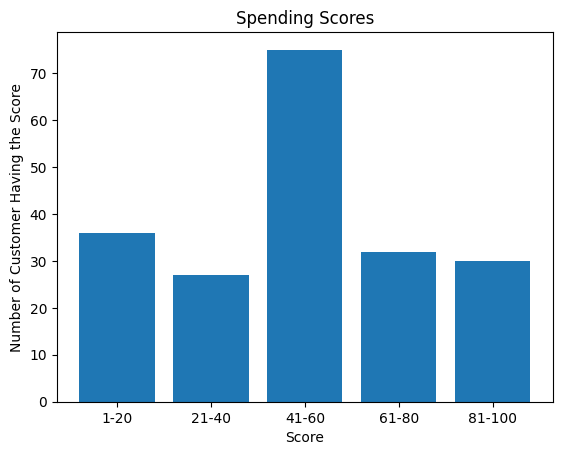

In [ ]:
# Gráfica de Barras de Scores de Gastos

ss1_20 = df1["Spending Score (1-100)"][(df1["Spending Score (1-100)"] >= 1) & (df1["Spending Score (1-100)"] <= 20)]
ss21_40 = df1["Spending Score (1-100)"][(df1["Spending Score (1-100)"] >= 21) & (df1["Spending Score (1-100)"] <= 40)]
ss41_60 = df1["Spending Score (1-100)"][(df1["Spending Score (1-100)"] >= 41) & (df1["Spending Score (1-100)"] <= 60)]
ss61_80 = df1["Spending Score (1-100)"][(df1["Spending Score (1-100)"] >= 61) & (df1["Spending Score (1-100)"] <= 80)]
ss81_100 = df1["Spending Score (1-100)"][(df1["Spending Score (1-100)"] >= 81) & (df1["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]


plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.bar(ssx, ssy)
plt.show()

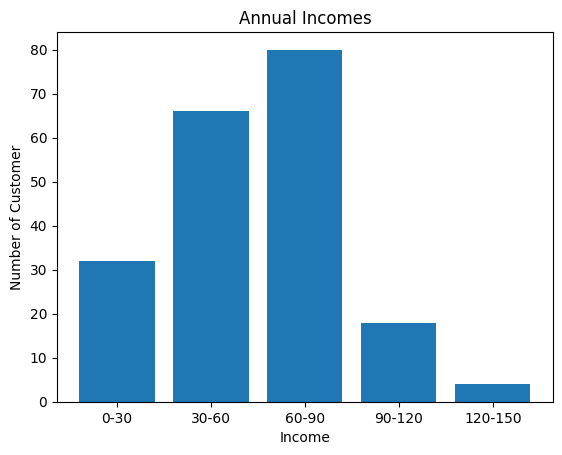

In [ ]:
# Gráfica de Barras de Ingresos Anuales

ai0_30 = df1["Annual Income (k$)"][(df1["Annual Income (k$)"] >= 0) & (df1["Annual Income (k$)"] <= 30)]
ai31_60 = df1["Annual Income (k$)"][(df1["Annual Income (k$)"] >= 31) & (df1["Annual Income (k$)"] <= 60)]
ai61_90 = df1["Annual Income (k$)"][(df1["Annual Income (k$)"] >= 61) & (df1["Annual Income (k$)"] <= 90)]
ai91_120 = df1["Annual Income (k$)"][(df1["Annual Income (k$)"] >= 91) & (df1["Annual Income (k$)"] <= 120)]
ai121_150 = df1["Annual Income (k$)"][(df1["Annual Income (k$)"] >= 121) & (df1["Annual Income (k$)"] <= 150)]

aix = ['0-30', '30-60', '60-90', '90-120', '120-150']
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.title('Annual Incomes')
plt.xlabel('Income')
plt.ylabel('Number of Customer')
plt.bar(aix, aiy)
plt.show()

In [ ]:
df1.iloc[:,2:]

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
#NO CORRAS ESTO
#Eliminar columda customer id y sexo para hacer K-means con los otros Edad, Score de Gato e Ingreso
#df1.drop(['CustomerID'], axis = 1, inplace=True)
#df1.drop(['Gender'], axis = 1, inplace=True)
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<a id=2></a><br>
## K-Means

# Completa el código para la gráfica del Método Elbow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

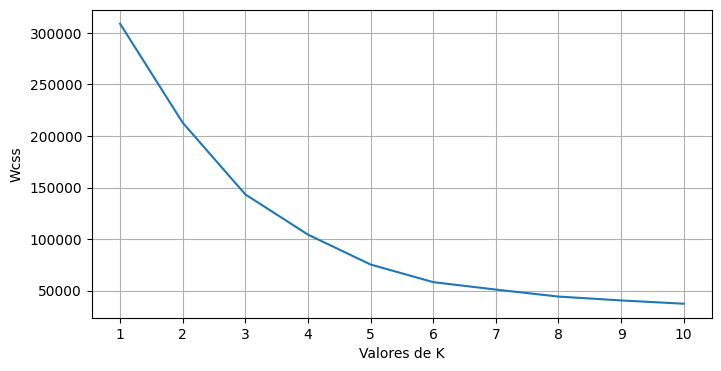

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df1.iloc[:,2:])
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (8,4))
plt.grid()
plt.plot(range(1,11), wcss)
plt.xlabel("Valores de K")
plt.ylabel("Wcss")
plt.xticks(np.arange(1,11,1))
plt.show()

## ¿Cuál es el valor de K que usarías?


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


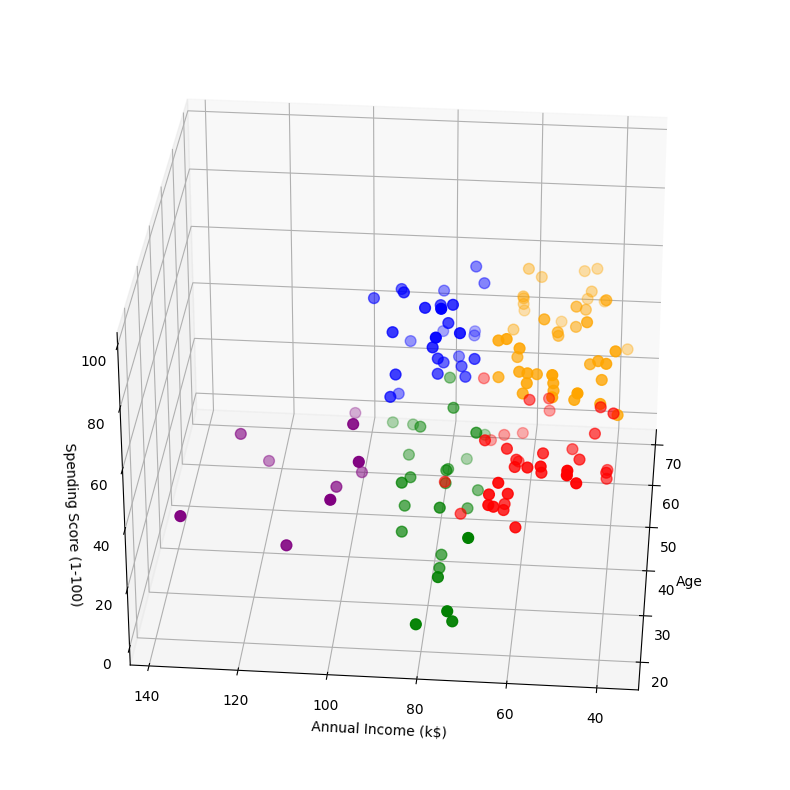

In [ ]:
# completa el código para poner el número de clusters que decidiste

km = KMeans(n_clusters = 8)
clusters_num = km.fit_predict(df1.iloc[:,2:])

# Crea una columna nueva con el cluster
df1['label'] = clusters_num

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Age[df1.label== 0], df1["Annual Income (k$)"][df1.label == 0], df1["Spending Score (1-100)"][df1.label == 0], c='blue', s=60)
ax.scatter(df1.Age[df1.label == 1], df1["Annual Income (k$)"][df1.label == 1], df1["Spending Score (1-100)"][df1.label == 1], c='red', s=60)
ax.scatter(df1.Age[df1.label == 2], df1["Annual Income (k$)"][df1.label == 2], df1["Spending Score (1-100)"][df1.label == 2], c='green', s=60)
ax.scatter(df1.Age[df1.label == 3], df1["Annual Income (k$)"][df1.label == 3], df1["Spending Score (1-100)"][df1.label == 3], c='orange', s=60)
ax.scatter(df1.Age[df1.label == 4], df1["Annual Income (k$)"][df1.label == 4], df1["Spending Score (1-100)"][df1.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

Tenemos 5 tipos de cientes que aparecen en la gráfica en diferentes colores


# Incluye aquí la descripción de cada uno de los clusters





Segun podemos ver en la grafica hay 5 grandes grupos:

**Color morado**: Son personas con un alto ingreso anual, así mismo podemos ver que este grupo de personas va entr los 40 y 80 años teniendo un score entre 50 y 80

**Color verde**: Este grupo de personas en muy diverso ya que las edades de estos van entre los 30 y 80 al igual que el score el cual este entre 20 y 80, podemos ver que su ingreso anual va entre 100 y 70

**Color azul**: En este grupo esta acumulado en lo mas alto del eje de "score", tienen un ingreso medio y se puede observar que son de los de mayor edad

**Color rojo**: El ingreso de este grupo esta entre los 40 y 80, mismo caso en su "score", sin embargo en cuanto a la edad estan entre un rango de 55 y 80

**Color amarillo**: Este grupo tiene de los valores mas altos de "score", mayor edad estando en un rango de 65 hasta 80, al mismo tiempo podemos ver que etse grupo es de los que menor ingreso tiene (entre 40 y 55)